In [122]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [123]:
def salt_pepper(img,p):
    result = np.zeros(img.shape,np.uint8)
    thres = 1-p
    rows, cols = img.shape
    for i in range(rows):
        for j in range(cols):
            rnd = np.random.rand()
            if(rnd<p):
                result[i][j] = 0
            elif(rnd>thres):
                result[i][j] = 255
            else:
                result[i][j] = img[i][j]
    return result

[[144 144 146 ... 150 134 108]
 [144 144 146 ... 150 134 108]
 [144 144 146 ... 150 134 108]
 ...
 [ 38  38  44 ...  88  82  80]
 [ 39  39  48 ...  85  87  89]
 [ 39  39  48 ...  85  87  89]]
[[  0   0   0 ... 108 108 108]
 [  0   0   0 ... 108 108 108]
 [  0   0   0 ... 108 108 108]
 ...
 [  0   0   0 ...  88  88  88]
 [  0   0   0 ...  88  88  88]
 [  0   0   0 ...  88  88  88]]
[[ 83 123 138 ... 132 152 135]
 [125 149 149 ... 122 126 117]
 [141 159 161 ... 110 104 103]
 ...
 [ 35  52  64 ... 144 122  85]
 [ 17  24  32 ... 124 114  91]
 [  4   8  18 ... 103  95  91]]


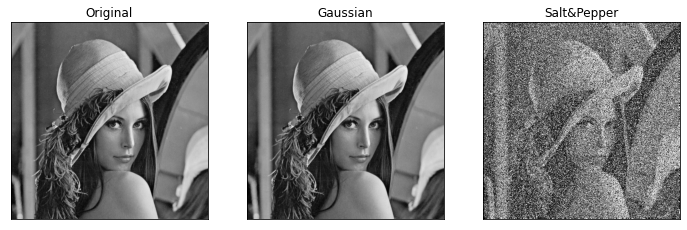

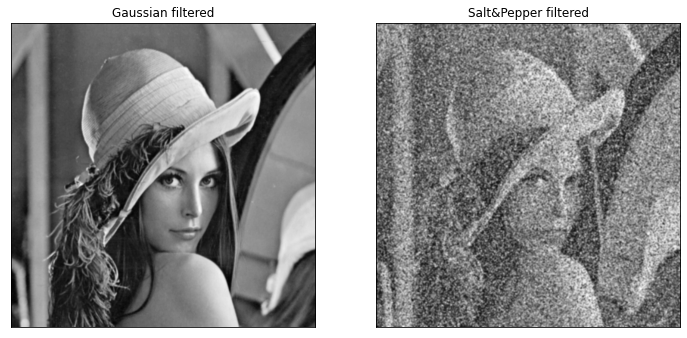

In [126]:
tiff_img = cv2.imread("C:\\Work\\Python\\Image_processing\\lena.tiff",cv2.IMREAD_COLOR)
gray_img = cv2.cvtColor(tiff_img,cv2.COLOR_RGB2GRAY)
height, width = gray_img.shape
# 분산 0.01, 표준편차 0.1
gauss = np.random.normal(0,0.1,(height,width))
gauss = gauss.reshape(height,width)
g_noise = np.zeros((height,width),dtype=np.float64)
#for i in range(row):
#    for j in range(col):
#        g_noise[i][j] = gray_img[i][j] + gauss[i][j]
#g_noise = np.uint8(g_noise)
g_noise = gray_img + gauss
g_img = np.clip(g_noise,0,255).astype(np.uint8)
#g_img_pad = cv2.copyMakeBorder(g_img,50,50,50,50,cv2.BORDER_CONSTANT,value=0)
g_img_pad = cv2.copyMakeBorder(g_img,1,1,1,1,cv2.BORDER_REPLICATE)
#g_noise = np.uint8(g_noise)
filter_3x3 = (1/16)*np.array([[1,2,1],[2,4,2],[1,2,1]])
filter_5x5 = (1/256)*np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])

s_noise = salt_pepper(g_img,0.2)
s_img = np.clip(s_noise,0,255).astype(np.uint8)
s_img_pad = cv2.copyMakeBorder(s_img,2,2,2,2,cv2.BORDER_REPLICATE)

g_restored = np.zeros((height,width))
s_restored = np.zeros((height,width))


for i in range(height):
    for j in range(width):
        g_restored[i][j] = np.sum(g_img_pad[i:i+3,j:j+3] * filter_3x3)
        s_restored[i][j] = np.sum(s_img_pad[i:i+5,j:j+5] * filter_5x5)
#g_blur = cv2.filter2D(g_img_pad,-1,filter_3x3)
#s_blur = cv2.filter2D(s_img_pad,-1,filter_5x5)
#s_blur = cv2.medianBlur(s_img_pad,3)

g_restored = np.clip(g_restored,0,255).astype(np.uint8)
s_restored = np.clip(s_restored,0,255).astype(np.uint8)

print(gray_img)
print(s_img_pad)
print(s_restored)


rows = 1
cols = 3
fig, axes = plt.subplots(rows,cols,figsize=(12,6))

axes[0].imshow(gray_img,cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].imshow(g_img_pad,cmap='gray')
axes[1].set_title('Gaussian')
axes[1].set_xticks([])
axes[1].set_yticks([])

axes[2].imshow(s_img_pad,cmap='gray')
axes[2].set_title('Salt&Pepper')
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.show()

rows = 1
cols = 2
fig, axes = plt.subplots(rows,cols,figsize=(12,6))

axes[0].imshow(g_restored,cmap='gray')
axes[0].set_title('Gaussian filtered')
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].imshow(s_restored,cmap='gray')
axes[1].set_title('Salt&Pepper filtered')
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.show()
#cv2.imshow('',g_noise)
#cv2.waitKey()

#cv2.destroyAllWindows()

In [88]:
test = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        test[i][j] = np.sum(filter_5x5[i:i+3,j:j+3] * filter_3x3)
print(test)
#print(filter_3x3*filter_5x5)

[[0.05493164 0.07324219 0.05493164]
 [0.07324219 0.09765625 0.07324219]
 [0.05493164 0.07324219 0.05493164]]
